<a href="https://colab.research.google.com/github/martinpius/PG_training/blob/main/pg_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

In [54]:
import warnings
warnings.filterwarnings(action = "ignore")

In [55]:
url = "https://raw.githubusercontent.com/martinpius/PG_training/refs/heads/main/iris_data.csv"

In [56]:
# Launching google drive
# from google.colab import drive
# drive.mount("/content/drive/", force_remount = True)

In [57]:
df = pd.read_csv(url)

In [58]:
df.to_csv("iris.csv")

In [59]:
df.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


In [60]:
# 1. Descriptive Analysis
print("Descriptive Analysis:")
print(df.describe())  # Summary statistics
print("\nClass Distribution:")
print(df['species'].value_counts())  # Class distribution


Descriptive Analysis:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Class Distribution:
species
setosa        50
vers

In [61]:
print(f"Missing statistics: \n\n{df.isna().sum()}")

Missing statistics: 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


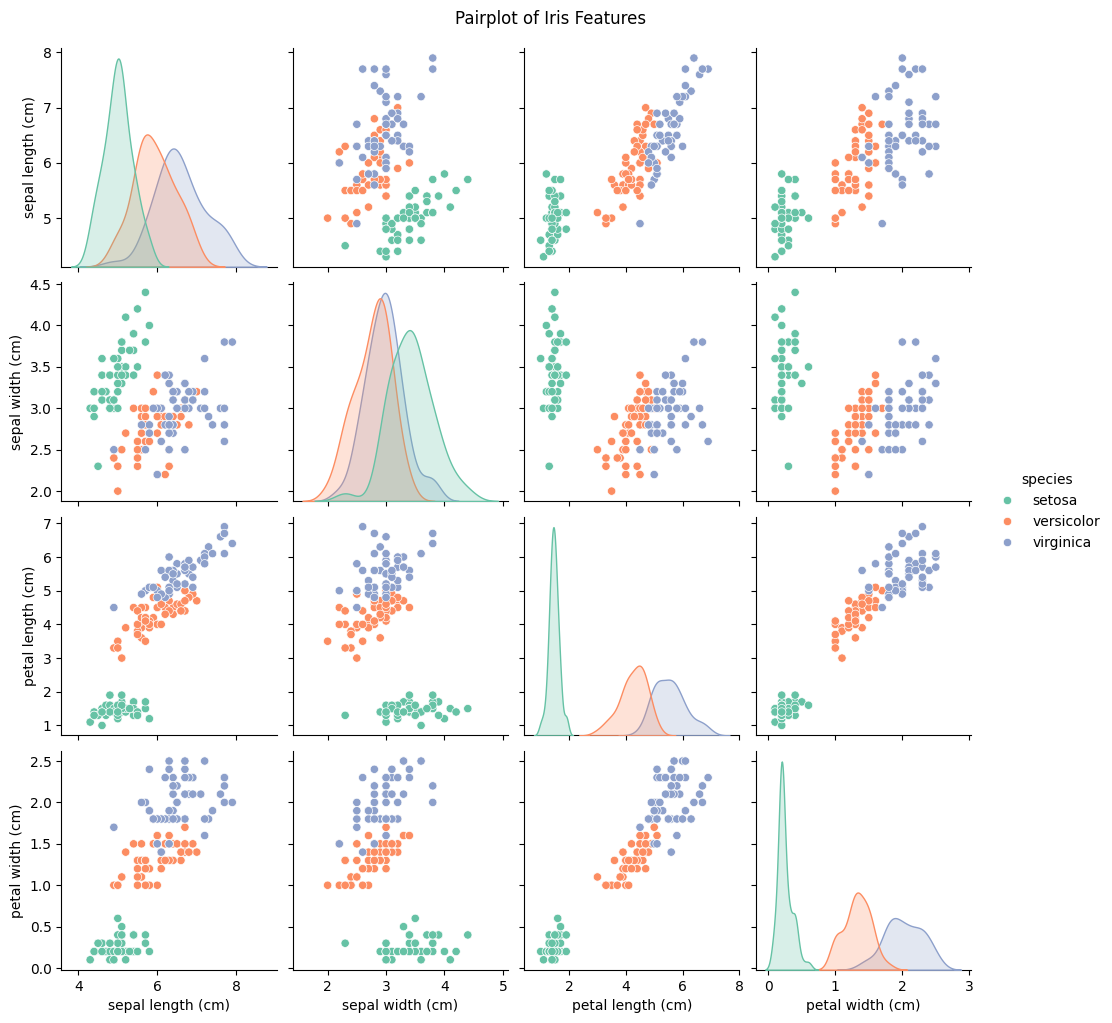

In [62]:

# 2. Data Visualization
# Pairplot for feature relationships
sns.pairplot(df.drop(columns = ["target"], axis = 1), hue="species", palette="Set2")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


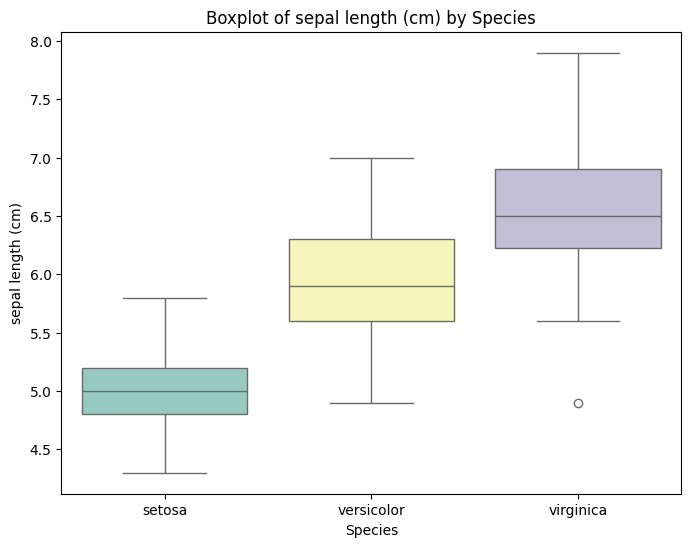

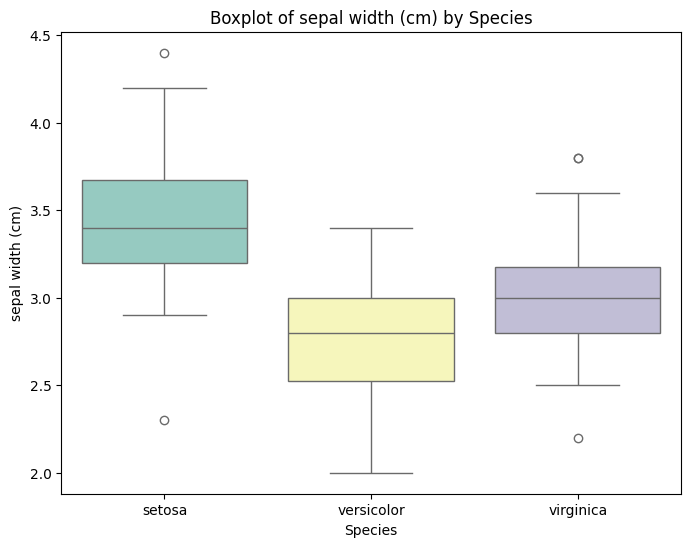

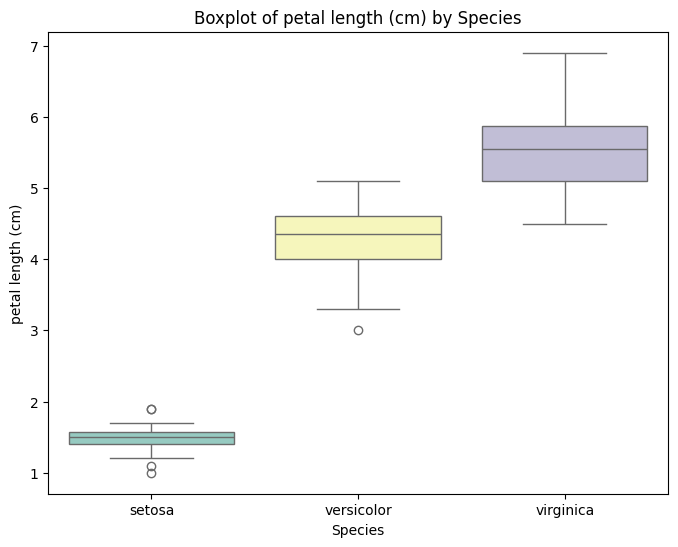

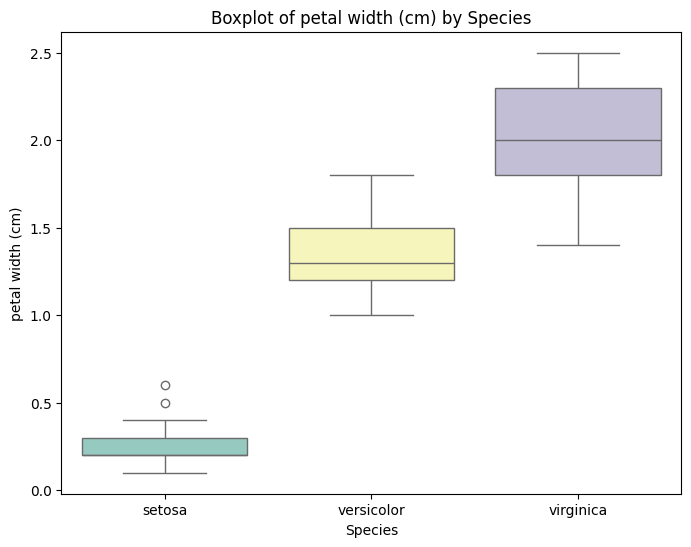

In [63]:
# Boxplot for feature distributions by species
for feature in df.columns[:-2]:
    plt.figure(figsize = (8, 6))
    sns.boxplot(data=df, x="species", y=feature, palette="Set3")
    plt.title(f"Boxplot of {feature} by Species")
    plt.xlabel("Species")
    plt.ylabel(feature)
    plt.show()


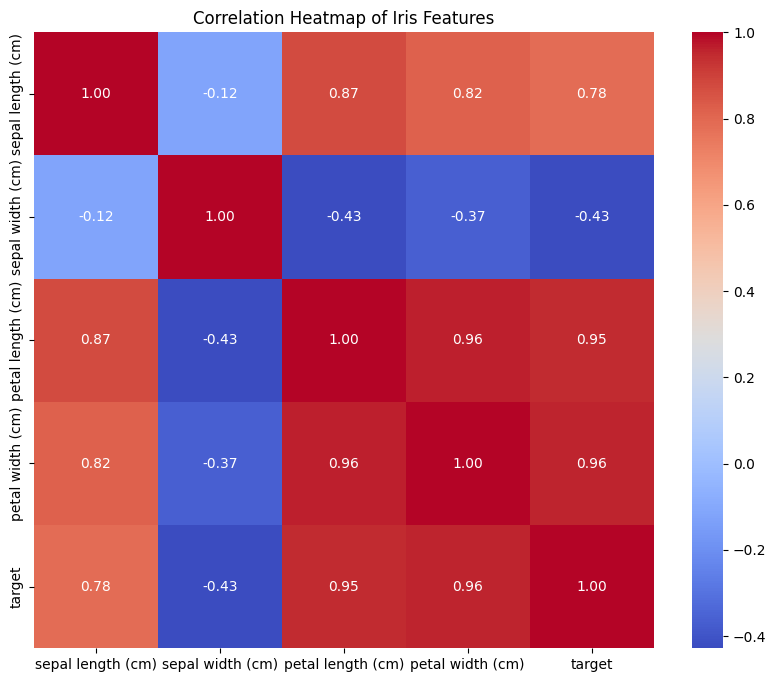

In [64]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

In [65]:
# 3. Train-Test Split
# Define features (X) and target (y)
cols = list(df.columns)
xcols = cols[:-2]
X = df[xcols]
y = df['target']

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [66]:
# 4. Model Training and Evaluation
# Logistic Regression
print("\n--- Logistic Regression ---")
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)  # Train the model
y_pred_logistic = logistic_model.predict(X_test)  # Predict on test set



--- Logistic Regression ---


In [67]:
# Compute metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average="weighted")
recall_logistic = recall_score(y_test, y_pred_logistic, average="weighted")
f1_logistic = f1_score(y_test, y_pred_logistic, average="weighted")

print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")


Accuracy: 0.9333
Precision: 0.9345
Recall: 0.9333
F1-Score: 0.9333


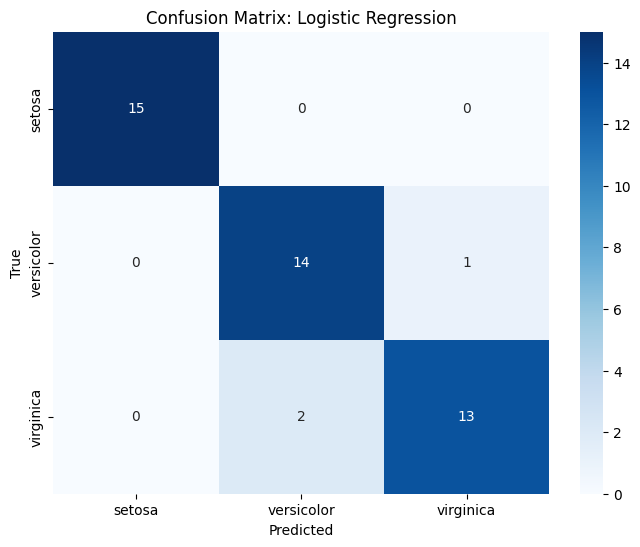

In [68]:
# Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=df.species.unique(), yticklabels=df.species.unique())
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [69]:
# support Vector Machine Model for classification (SVM)
print("\n--- Support Vector Machine (SVM) ---")
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)  # Train the model
y_pred_svm = svm_model.predict(X_test)  # Predict on test set



--- Support Vector Machine (SVM) ---


In [70]:
# Compute metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average="weighted")
recall_svm = recall_score(y_test, y_pred_svm, average="weighted")
f1_svm = f1_score(y_test, y_pred_svm, average="weighted")

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")

Accuracy: 0.9556
Precision: 0.9556
Recall: 0.9556
F1-Score: 0.9556


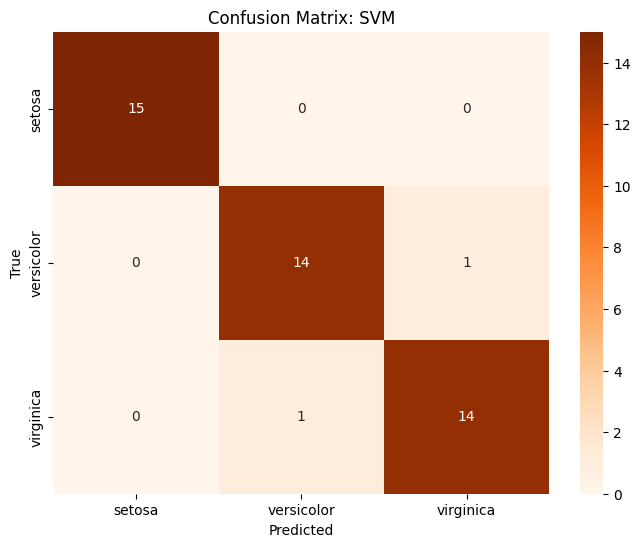

In [71]:

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=df.species.unique(), yticklabels=df.species.unique())
plt.title("Confusion Matrix: SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [72]:
# Decision Tree
print("\n--- Decision Tree ---")
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)  # Train the model
y_pred_tree = tree_model.predict(X_test)  # Predict on test set



--- Decision Tree ---


In [73]:
# Compute metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average="weighted")
recall_tree = recall_score(y_test, y_pred_tree, average="weighted")
f1_tree = f1_score(y_test, y_pred_tree, average="weighted")

print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall: {recall_tree:.4f}")
print(f"F1-Score: {f1_tree:.4f}")

Accuracy: 0.9111
Precision: 0.9111
Recall: 0.9111
F1-Score: 0.9111


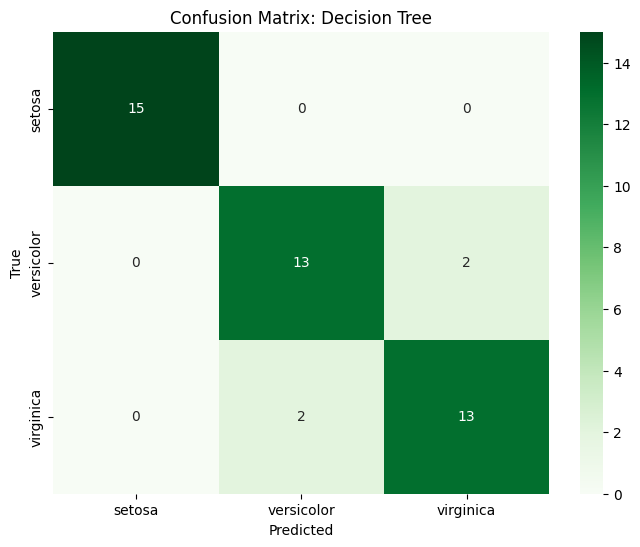

In [74]:
# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', xticklabels=df.species.unique(), yticklabels=df.species.unique())
plt.title("Confusion Matrix: Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

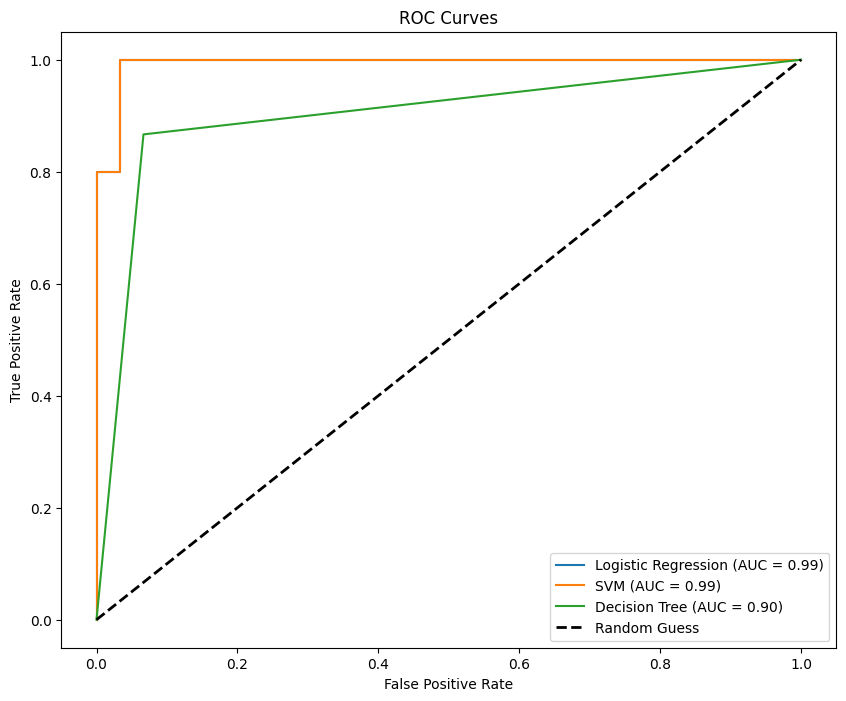

In [75]:
# 5. ROC Curve for All Models
plt.figure(figsize=(10, 8))
for model, name in zip([logistic_model, svm_model, tree_model], ["Logistic Regression", "SVM", "Decision Tree"]):
    y_prob = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 2], pos_label=2)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

In [76]:
# 6. Cross-Validation to Select Best Model
cv_accuracy_logistic = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy').mean()
cv_accuracy_svm = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy').mean()
cv_accuracy_tree = cross_val_score(tree_model, X, y, cv=5, scoring='accuracy').mean()

print("\n--- Cross-Validation Results ---")
print(f"Logistic Regression CV Accuracy: {cv_accuracy_logistic:.4f}")
print(f"SVM CV Accuracy: {cv_accuracy_svm:.4f}")
print(f"Decision Tree CV Accuracy: {cv_accuracy_tree:.4f}")



--- Cross-Validation Results ---
Logistic Regression CV Accuracy: 0.9733
SVM CV Accuracy: 0.9667
Decision Tree CV Accuracy: 0.9600


In [77]:
# Select the Best Model
if max(cv_accuracy_logistic, cv_accuracy_svm, cv_accuracy_tree) == cv_accuracy_logistic:
    print("\nBest Model: Logistic Regression")
elif max(cv_accuracy_logistic, cv_accuracy_svm, cv_accuracy_tree) == cv_accuracy_svm:
    print("\nBest Model: SVM")
else:
    print("\nBest Model: Decision Tree")


Best Model: Logistic Regression
